In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
data=pd.read_csv("/content/diabetes.csv")

# Data Cleaning and Data Preprocessing

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
21061,1,93,70,31,0,30.4,0.315,23,0
21062,1,111,62,13,182,24.0,0.138,23,0
21063,4,148,60,27,318,30.9,0.150,29,1
21064,1,103,80,11,82,19.4,0.491,22,0


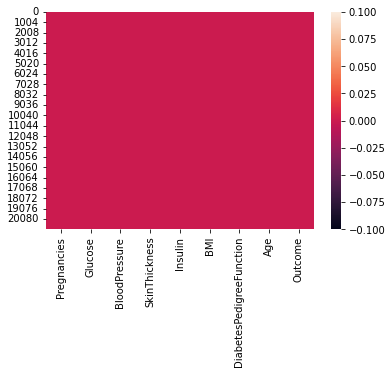

In [ ]:
#check for missing values 

sns.heatmap(data.isnull())

In [ ]:
#corelation matrix
correlation=data.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.133094,0.152318,-0.081130,-0.077460,0.004419,-0.043390,0.542929,0.219346
Glucose,0.133094,1.000000,0.141935,0.050109,0.324080,0.224130,0.135278,0.260128,0.476735
BloodPressure,0.152318,0.141935,1.000000,0.207015,0.088964,0.270921,0.029026,0.240151,0.062129
SkinThickness,-0.081130,0.050109,0.207015,1.000000,0.431610,0.396885,0.174954,-0.131202,0.066473
Insulin,-0.077460,0.324080,0.088964,0.431610,1.000000,0.202165,0.164225,-0.050730,0.125300
BMI,0.004419,0.224130,0.270921,0.396885,0.202165,1.000000,0.141962,0.019602,0.286043
DiabetesPedigreeFunction,-0.043390,0.135278,0.029026,0.174954,0.164225,0.141962,1.000000,0.029994,0.181295
Age,0.542929,0.260128,0.240151,-0.131202,-0.050730,0.019602,0.029994,1.000000,0.236418
Outcome,0.219346,0.476735,0.062129,0.066473,0.125300,0.286043,0.181295,0.236418,1.000000


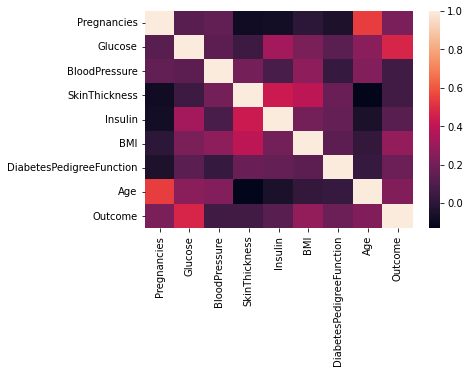

In [ ]:
#heatmap for correlation
sns.heatmap(correlation)

In [ ]:
#train test split
x=data.drop("Outcome",axis=1)
y=data['Outcome']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
x.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
#train model


# CROSS VALIDATION (IN ORDER TO KNOW BETTER MODEL)

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
cross_val_score(KNeighborsClassifier(),x,y)

array([1., 1., 1., 1., 1.])

In [ ]:
cross_val_score(SVC(),x,y)

array([0.78452776, 0.78803703, 0.78162829, 0.78969855, 0.79159744])

In [ ]:
cross_val_score(LogisticRegression(),x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.77669673, 0.78732495, 0.776169  , 0.78685023, 0.78471398])

In [ ]:
cross_val_score(SVC(),x,y)

array([0.78452776, 0.78803703, 0.78162829, 0.78969855, 0.79159744])

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=60, ),x,y)

array([1., 1., 1., 1., 1.])

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=5),x,y)

array([1., 1., 1., 1., 1.])

# RANDOM FOREST CLASSIFIER TRAINED AND ACCURACY SCORE GOTTEN

In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#making prediction

prediction=model.predict(x_test)
prediction

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
#Evaluation (accuracy measurement)
accuracy=accuracy_score(prediction,y_test)
accuracy

1.0